<a href="https://colab.research.google.com/github/ekisabana/DSC/blob/main/test_DSC_Q1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVR
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/data_train.csv')
df.head()

,EmployeeID,Attrition,Age,Department,EducationField,Gender,JobLevel,JobRole,JobSatisfaction,EnvironmentSatisfaction,PerformanceRating,MaritalStatus,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,2663,No,32,Research & Development,Technical Degree,Male,Entry Level,Research Scientist,1,4,Baik,Single,Rp2.439.000,1,4,4,4,2,1
1,3247,No,33,Research & Development,Medical,Female,Entry Level,Research Scientist,2,3,Sangat Baik,Married,Rp2.622.000,6,7,3,3,2,1
2,3697,No,45,Research & Development,Life Sciences,Male,Junior,Laboratory Technician,2,3,Baik,Married,Rp4.447.000,1,9,5,9,7,0
3,3867,No,32,Sales,Marketing,Male,Junior,Sales Executive,2,3,Baik,Married,Rp4.078.000,0,4,3,3,2,1
4,2409,Yes,54,Research & Development,Medical,Female,Junior,Research Scientist,3,2,Baik,Married,Rp4.441.000,3,11,3,8,2,7


In [ ]:
def income(y):
    val = y.upper()
    val = val.replace('RP', '')
    val = val.replace('.', '')
    return val

In [ ]:
df['MonthlyIncome'] = df.MonthlyIncome.apply(lambda x: income(x))
df['MonthlyIncome'] = df['MonthlyIncome'].astype(str).astype(int)

In [ ]:
df.describe()

,EmployeeID,Age,JobSatisfaction,EnvironmentSatisfaction,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1194.000000,1194.000000,1194.000000,1194.000000,1.194000e+03,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,2800.747069,36.617253,2.681742,2.685092,6.177496e+06,2.865159,10.771357,2.780570,6.746231,4.038526,2.168342
std,991.962654,9.230407,1.114960,1.115161,4.697508e+06,2.532817,7.812051,1.287801,6.266912,3.659001,3.271862
min,1101.000000,18.000000,1.000000,1.000000,5.090000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1940.000000,30.000000,2.000000,2.000000,2.702250e+06,1.000000,6.000000,2.000000,2.000000,2.000000,0.000000
50%,2804.000000,35.000000,3.000000,3.000000,4.619000e+06,2.000000,9.000000,3.000000,5.000000,3.000000,1.000000
75%,3654.500000,42.000000,4.000000,4.000000,7.706500e+06,4.000000,14.000000,3.000000,9.000000,7.000000,2.000000
max,4513.000000,60.000000,4.000000,4.000000,1.999900e+07,10.000000,40.000000,6.000000,40.000000,18.000000,15.000000


<Figure size 1500x1500 with 0 Axes>

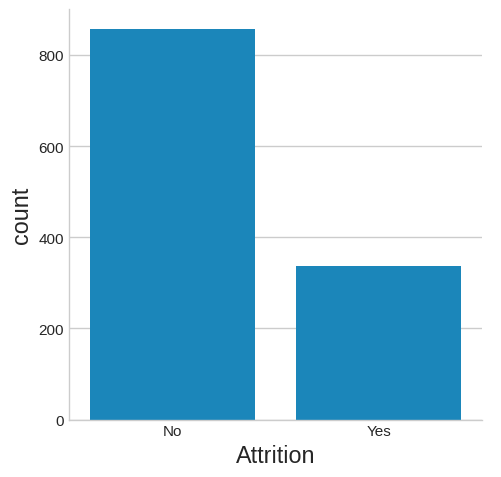

<Figure size 1500x1500 with 0 Axes>

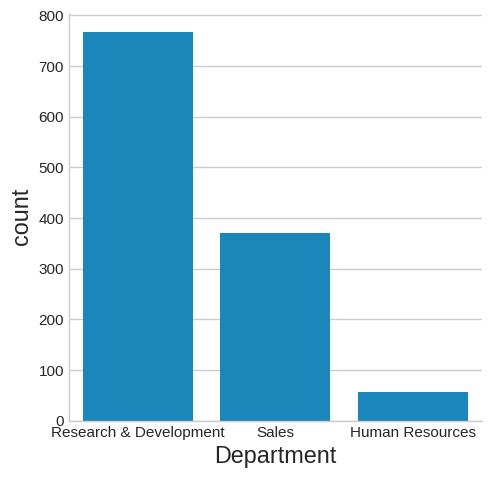

<Figure size 1500x1500 with 0 Axes>

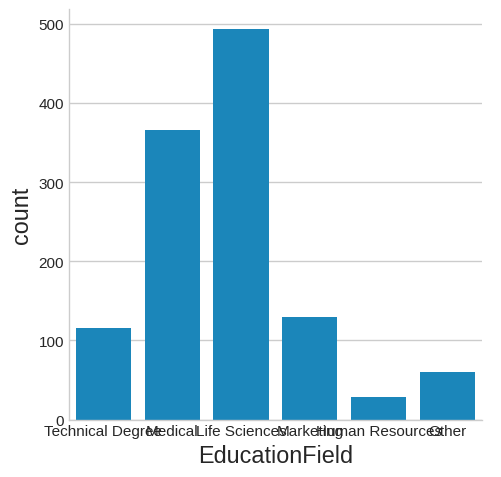

<Figure size 1500x1500 with 0 Axes>

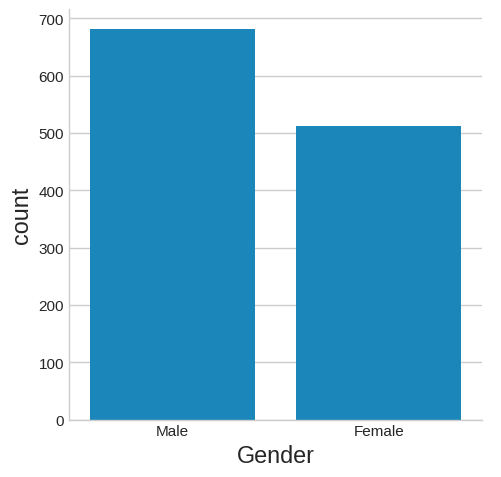

<Figure size 1500x1500 with 0 Axes>

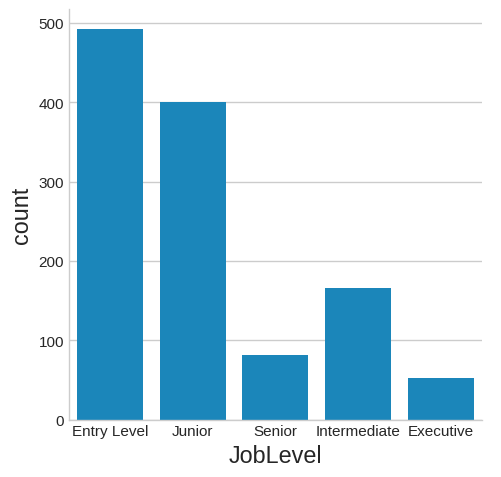

<Figure size 1500x1500 with 0 Axes>

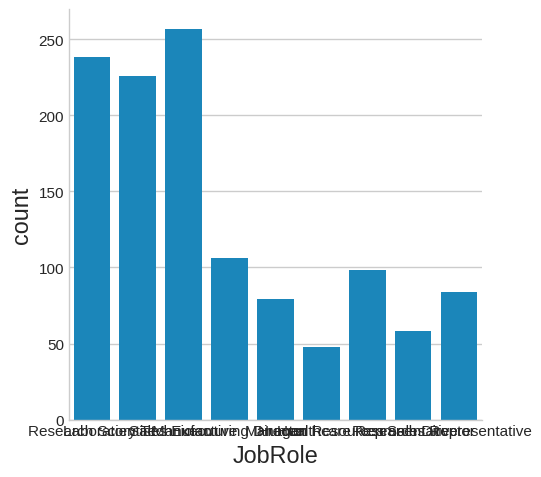

<Figure size 1500x1500 with 0 Axes>

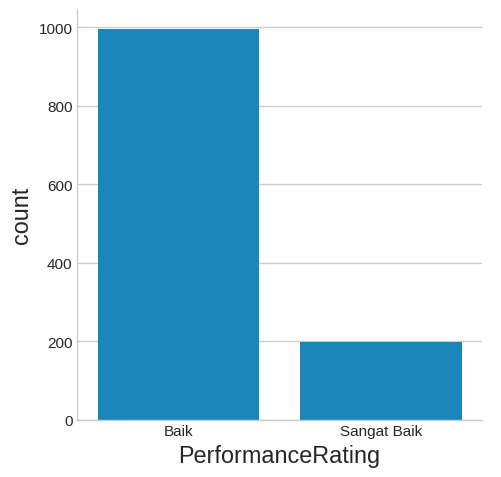

<Figure size 1500x1500 with 0 Axes>

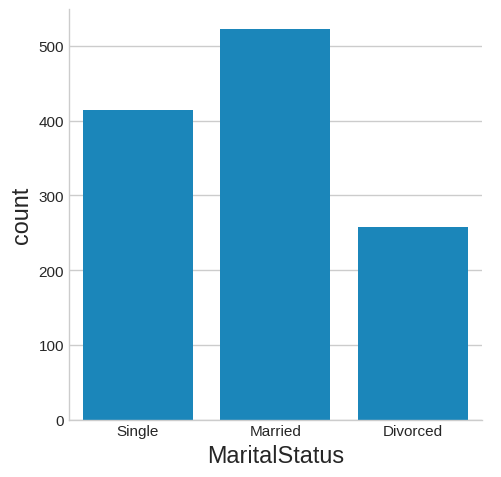

In [ ]:
cat_df=df.select_dtypes(include='object')

for i in cat_df:
    plt.figure(figsize=(15, 15))
    sns.catplot(data=df,x=i,kind='count')

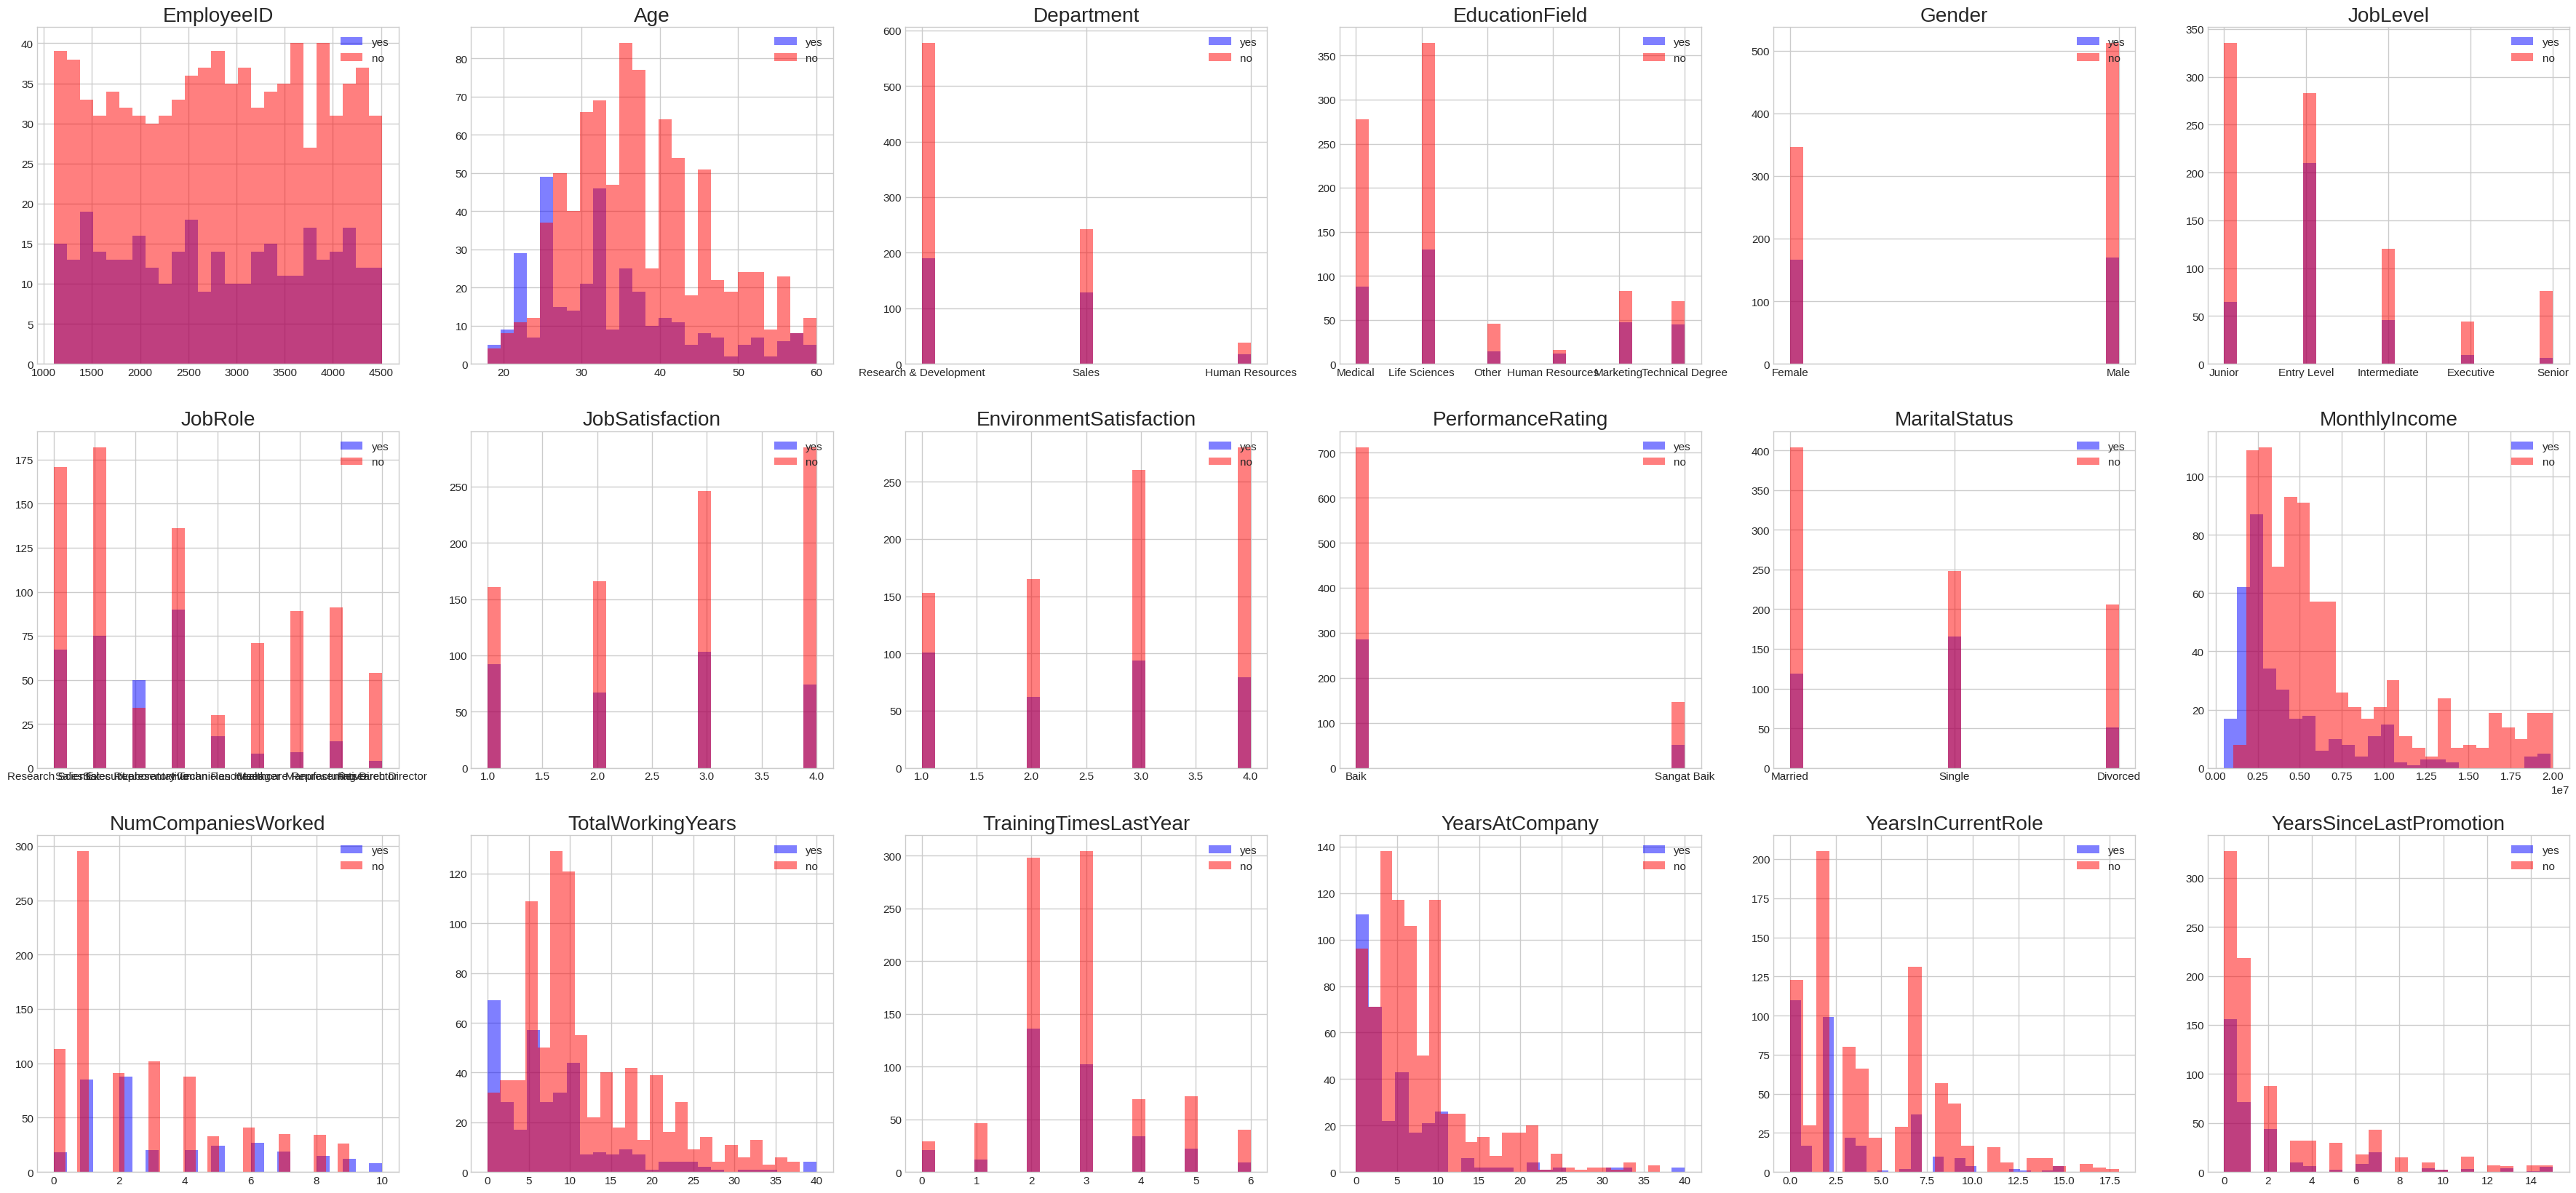

In [ ]:
#plot distributions
k=1
plt.figure(figsize=(40, 40))
for col in df:
  if col=="Attrition":
    continue
  yes = df[df['Attrition'] == 'Yes'][col]
  no = df[df['Attrition'] == 'No'][col]
  plt.subplot(6, 6, k)
  plt.hist(yes, bins=25, alpha=0.5, label='yes', color='b')
  plt.hist(no, bins=25, alpha=0.5, label='no', color='r')
  plt.legend(loc='upper right')
  plt.title(col)
  k+=1

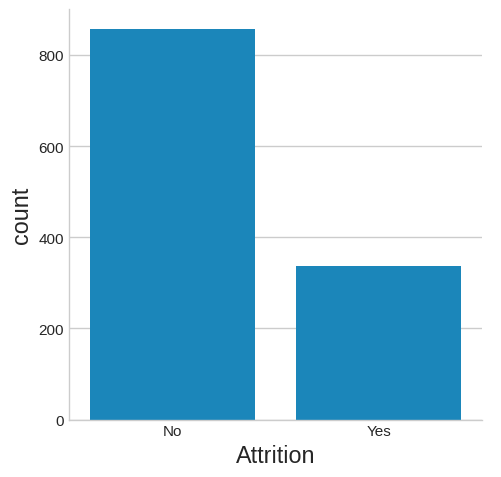

In [ ]:
sns.catplot(data=df,x="Attrition",kind='count')

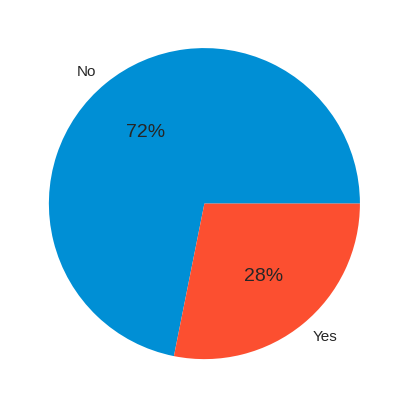

In [ ]:
# colors = sns.color_palette("husl", 2)
plt.pie(df['Attrition'].value_counts(),labels=['No','Yes'],autopct='%.0f%%')
plt.show()

Text(0.5, 1.0, 'Stacked Bar Chart of Job satisfaction vs attrition')

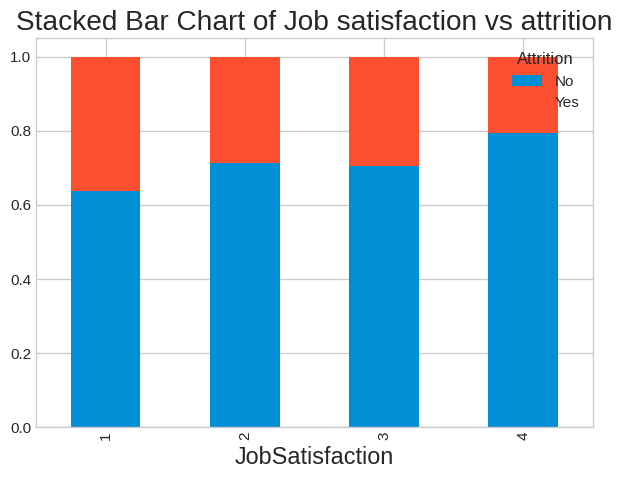

In [ ]:
table=pd.crosstab(df.JobSatisfaction, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job satisfaction vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Business Department vs attrition')

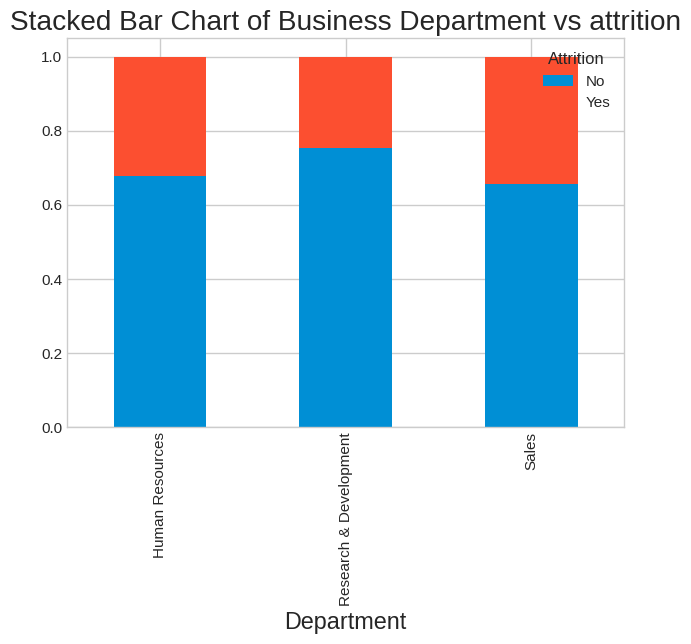

In [ ]:
table=pd.crosstab(df.Department, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Department vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Promotion vs attrition')

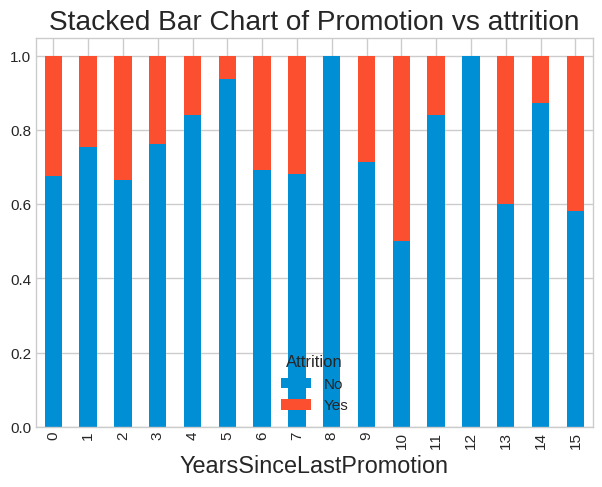

In [ ]:
table=pd.crosstab(df.YearsSinceLastPromotion, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Promotion vs attrition')

<Axes: >

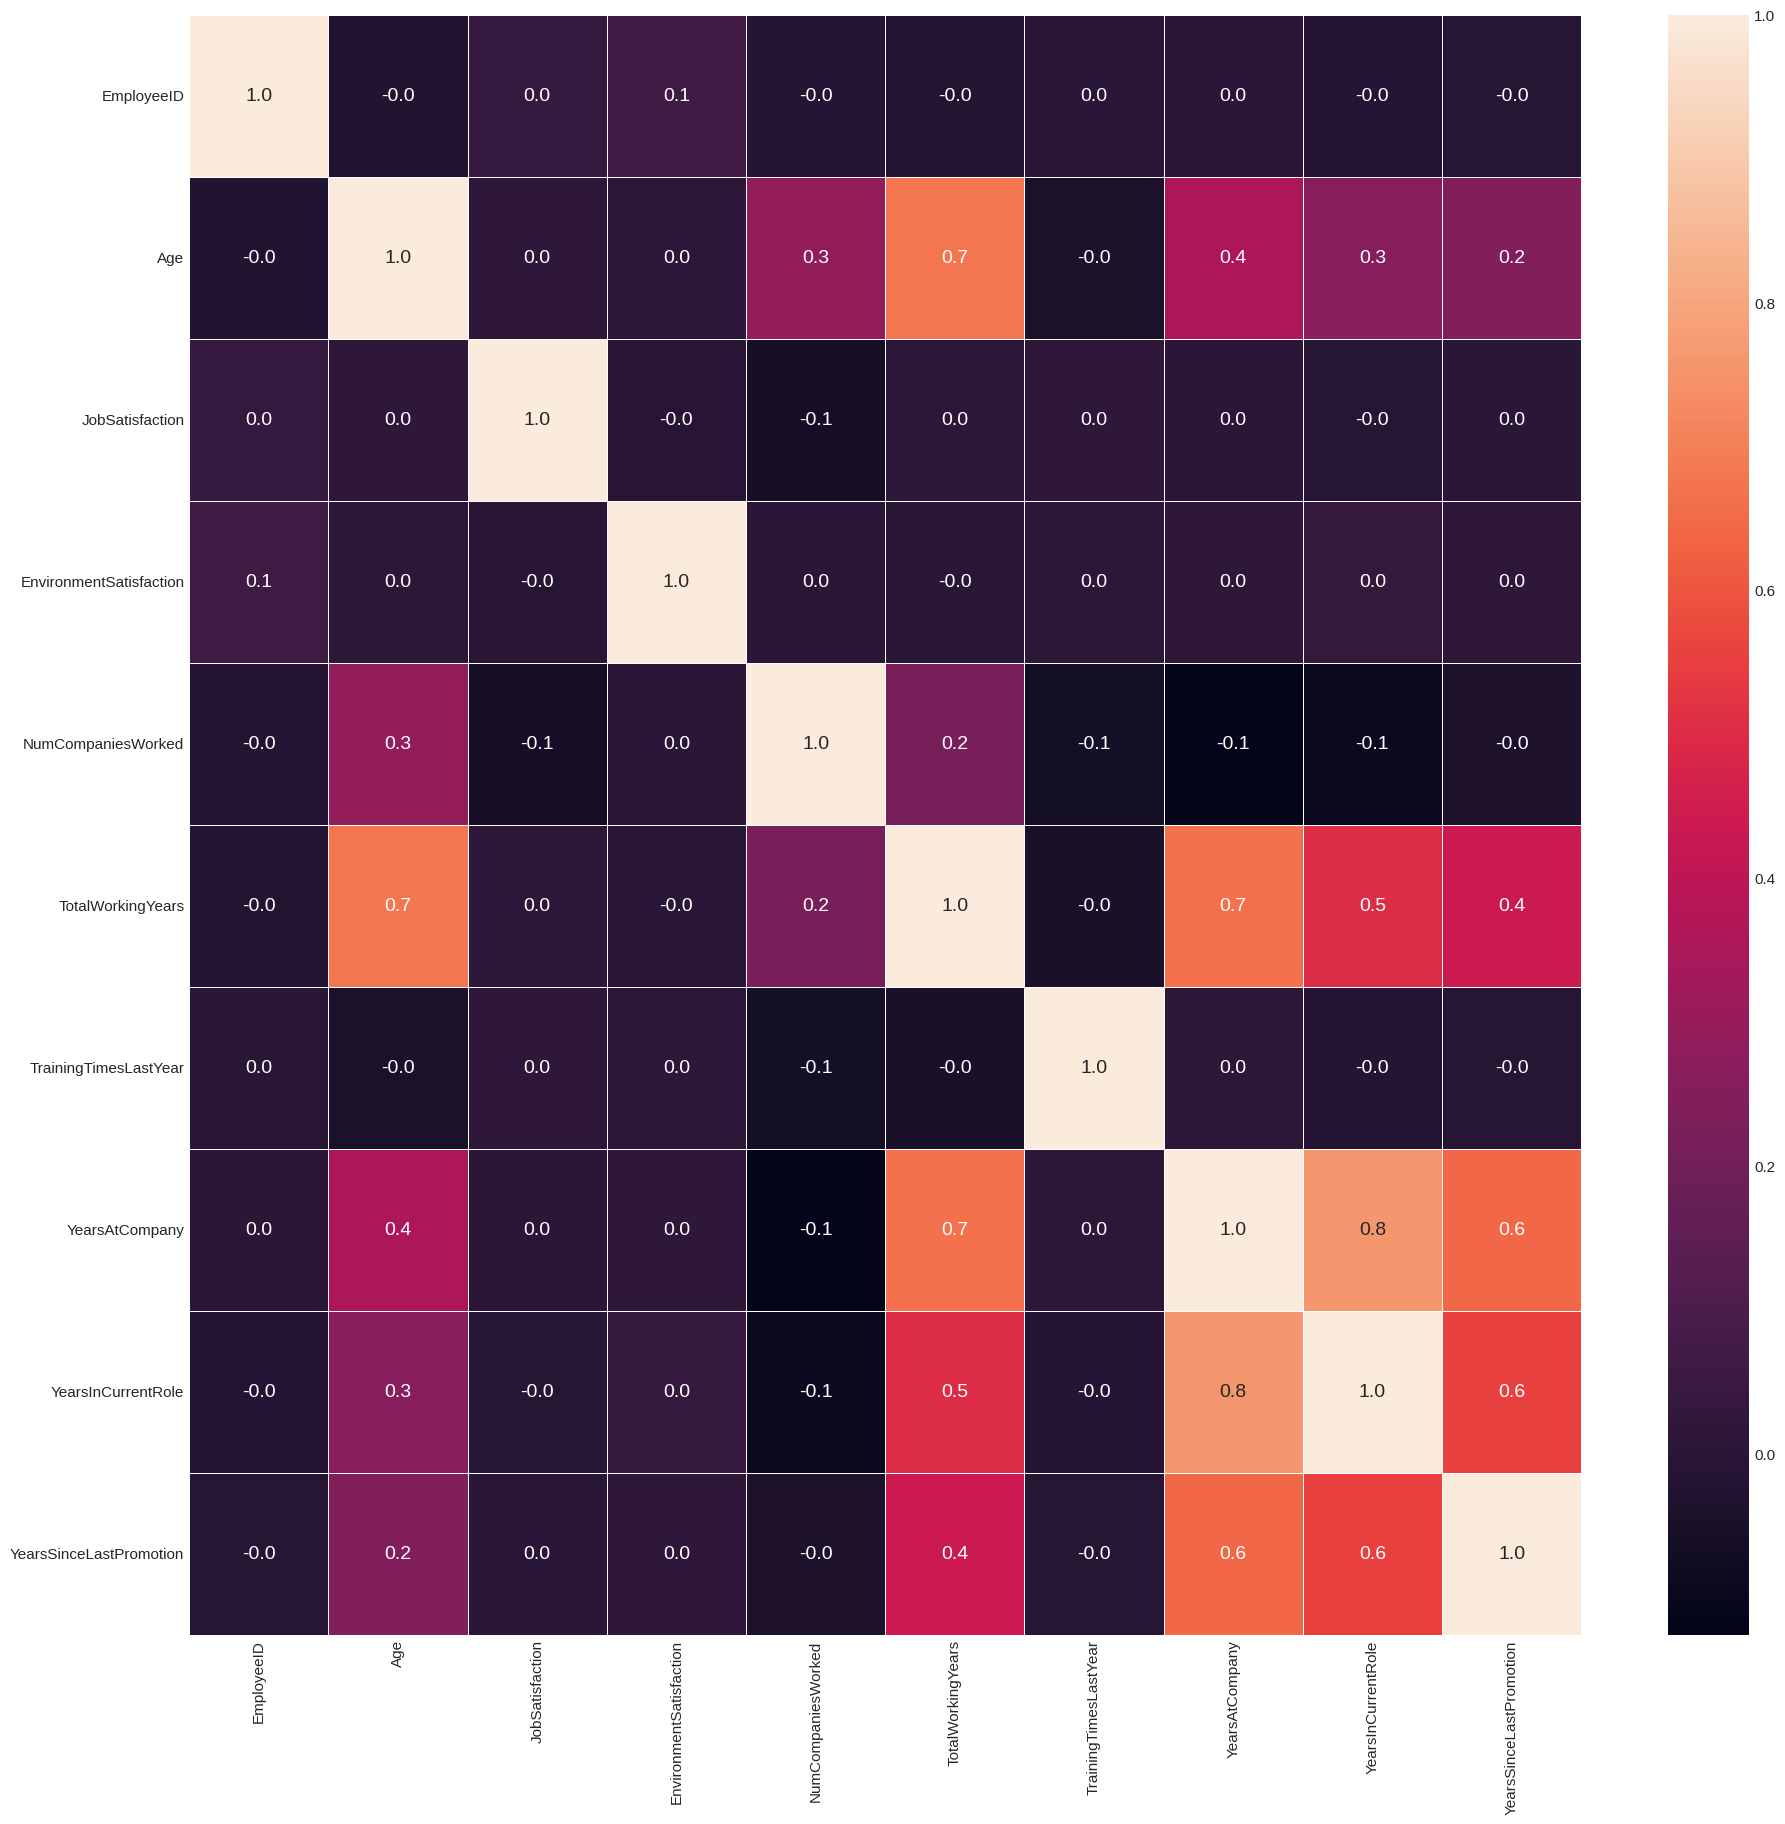

In [ ]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f')

<Axes: xlabel='JobRole', ylabel='count'>

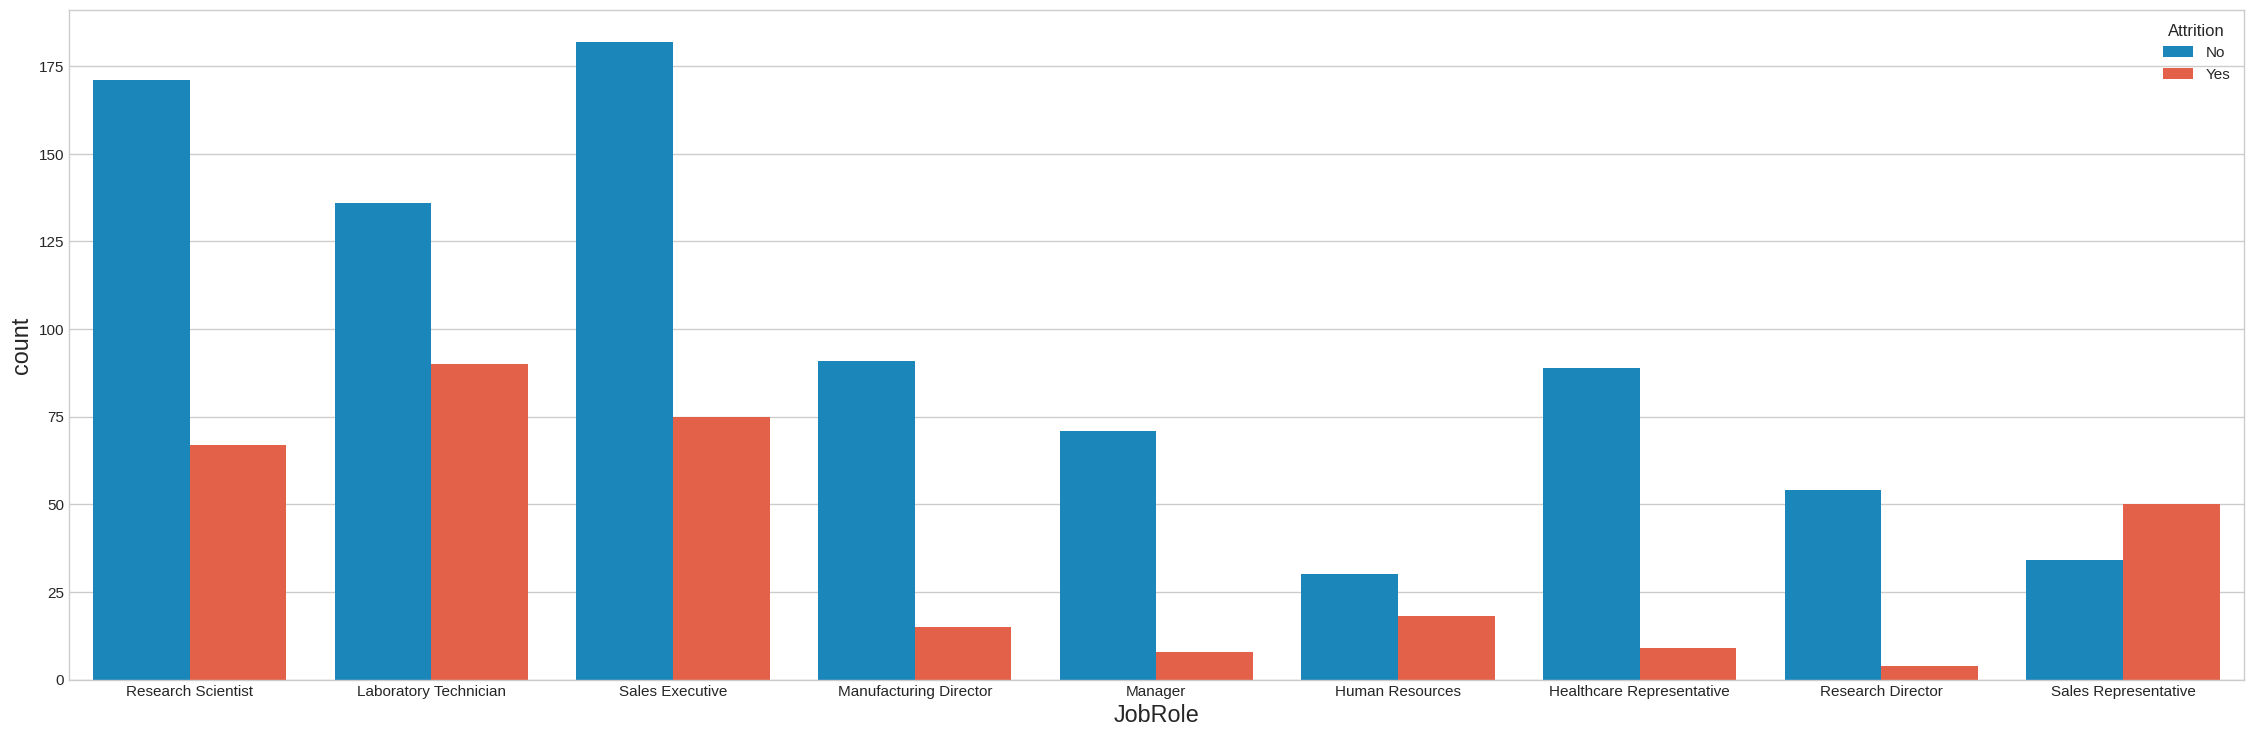

In [ ]:
a4_dims = (25, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=df,x="JobRole",hue="Attrition", ax=ax )